In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


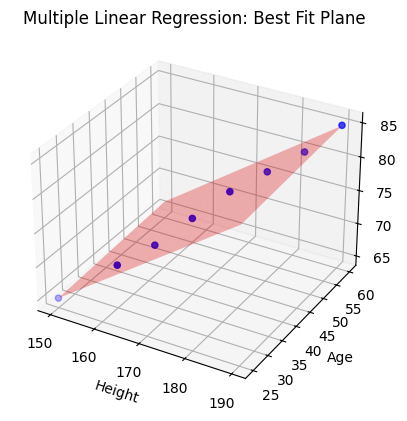

In [5]:
# Sample dataset (Height, Age) -> Weight
data = {
    'Height': [150, 160, 165, 170, 175, 180, 185, 190],
    'Age': [25, 30, 35, 40, 45, 50, 55, 60],
    'Weight': [65, 70, 72, 75, 78, 80, 82, 85]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define independent (X) and dependent (Y) variables
X = df[['Height', 'Age']]  # Independent variables
Y = df['Weight']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Predict the output for the test data
Y_pred = model.predict(X_test)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(df['Height'], df['Age'], df['Weight'], color='blue', label='Actual Data')

# Create a mesh grid for plotting the best-fit plane
height_grid, age_grid = np.meshgrid(
    np.linspace(df['Height'].min(), df['Height'].max(), 10),
    np.linspace(df['Age'].min(), df['Age'].max(), 10)
)
weight_grid = model.intercept_ + model.coef_[0] * height_grid + model.coef_[1] * age_grid

# Plot the best-fit plane
ax.plot_surface(height_grid, age_grid, weight_grid, alpha=0.3, color='red', label='Best Fit Plane')

# Labels and title
ax.set_xlabel('Height')
ax.set_ylabel('Age')
ax.set_zlabel('Weight')
ax.set_title('Multiple Linear Regression: Best Fit Plane')

# Show the plot
plt.show()
